### Recommendation System in Banks

Today, every industry is making full use of recommendation systems with their own tailored versions. Several non-financial entities are coming up in the payments domain and each of these non-financial organisations has built a steady customer base and has powerful product recommendation engines. It is time for banks to get involved in a more personalized relationship with their customer by investing in powerful recommendation engines. 

Firstly, for powerful recommendation engines, banks need immense amounts of customer data. Banks, however, have to abide by a lot of compliance and regulations in the modern age. The financial data which banks hold or attempt to hold classifies itself on the most interesting end of the data spectrum and is of immense importance to customers and hackers. Hence, customers would use the greater rights like 'Right to Forget' as stated in the GDPR laws governing the European Union for such classified data. Banks are aware of this, which makes it extremely important for them to find the right balance between securing customer data and providing accurate and satisfying recommendations.


### How It Works?

1) Rule Number 1: Collect your data from every nook and corner and ANALYZE IT

On an average, data professionals spend only 40% of their time analysing data. However, more than 91% of top-level executives agree that data takes the highest priority in hacking customer experiences.  Now, there are three major types of customer data, which when referenced, provides for a plethora of insightful suggestions.  These 3 data types – Reference Data, Transactional Data and Social Data – are filtered by data analysts.
Reference Data gives information into the customer’s profile and general preferences. These data points always form the base of any customer data lake used in creating a recommendation engine. Transactional Data consists of data, which pinpoints to any customer behaviours in the form of payments and transactions. These data points could include transactional and complaints history, different agendas recorded from the customers’ visit to the bank and so on. Finally, Social Data adds flair to the entire data lake by giving a taste of the customers’ mood by collecting data from their social media engagements and activities online.

2) Rule Number 2: Governance and Integrity of your Data

89% of CIOs agree that bad data has been hurting their ability to provide enriched customer experiences. During the data ingestion process, it is highly likely that the data obtained would seem corrupted, incomplete and present with several outliers. Corrupted data, when fed into your machine-learning algorithm, affects the recommendation engine and provides a completely different and incorrect view of your customer.
The lack of measures to ensure data integrity would end up being disastrous for any bank, especially in the current highly competitive banking ecosystem.  Besides this, there are many data dependencies within a database. This means that data completeness is crucial to make sense of the data. Each of these tasks requires people with adequate and high levels of technical knowledge, which is often not the case.

3) Drawing Insights

Product Recommendation Engines depend on the self-learning ability of machine learning algorithms. With sufficient and massive chunks of data on the customer, the process of deriving insights becomes easier.
A forecast model of the customer’s profitability through wealth management is drawn and the decision making process of the next best action takes place. Segmentation of customers into different classes at banks based on the loyalty quotient and products also takes place, which helps in better customer retention. Segregation of customers also takes place according to their credit risk score. This could help banks to segregate their customers accordingly and could recommend low-risk products for those customers.


### What are the types of Recommender Engines ?

There are broadly two types of recommender engines.

1. Context Based 

As the name suggests, these algorithms are strongly based on driving the context of the item. Once you have gathered this context level information on items, you try to find look alike items and recommend them. For instance on Youtube, you can find genre, language, starring of a video. Now based on these information we can find look alike (related) of these videos. Once we have look alike, we simply recommend these videos to a customer who originally saw the first video only. Such algorithms are very common in video streaming channels, online music stores, etc. Plausible reason being, such context level information is far easier to get when the product/item can be explained with few dimensions.

2. Collaborative Filtering 

This is one of the most commonly used algorithm because it is not dependent on any additional information. All you need is the transaction level information of the industry. For instance: e-commerce player like Amazon and banks like American Express often use these algorithm to make merchant/product recommendations. Further, there are several types of collaborative filtering algorithms:
   - User-User Collaborative Filtering: Here we find look alike customer to every customer and offer products which first customer’s look alike has chosen in past. This algorithm is very effective but takes a lot of time and resources since it requires to compute every customer pair information. Therefore, for big base platforms, this algorithm is hard to implement without a very strong parallelizable system.
   - Item-Item Collaborative Filtering: It is quite similar to previous algorithm, but instead of finding customer look alike, we try finding item look alike. Once we have item look alike matrix, we can easily recommend similar items to customer who have purchased any item from the store. This algorithm is far less resource consuming than user-user collaborative filtering. Hence, for a new customer the algorithm takes far lesser time than user-user collaborate as we don’t need all similarity scores between customers. And with fixed number of products, product-product look alike matrix is fixed over time.

In [1]:
## Notebook contains:
## Analysis on bank products data set 
## Provide recommendation to User B depending on User A buying pattern
## List the top 10 similar products based on cosine similarity matrix from sklearn

### 1. Load the libraries and data set

In [2]:
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity

In [3]:
df = pd.read_csv('Bank Products.csv', encoding = 'unicode_escape')

In [4]:
df.head()

,Product Code,Product Description,Purchase/Usage Frequency,Date,Customer ID,State
0,85123A,Recurrent Deposit Account,1,12-01-2010 08:26,17850,Uttar Pradesh
1,84879,Guarantees,1,12-01-2010 08:34,13047,Uttar Pradesh
2,22727,Savings Account,1,12-01-2010 08:45,12583,Uttarakhand
3,22086,Vehicle Insurance,1,12-01-2010 09:00,13748,Uttar Pradesh
4,85123A,Recurrent Deposit Account,1,12-01-2010 09:02,17850,Uttar Pradesh


In [5]:
df.shape

(28600, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28600 entries, 0 to 28599
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Product Code              28600 non-null  object
 1   Product Description       28600 non-null  object
 2   Purchase/Usage Frequency  28600 non-null  int64 
 3   Date                      28600 non-null  object
 4   Customer ID               28600 non-null  int64 
 5   State                     28600 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.3+ MB


- The dataset in use consists of 28600 records and 5 features 

### 2. Explore the Data

In [7]:
df['Product Description'].nunique()

33

In [8]:
df['Product Code'].nunique()

33

The bank has 33 varied products to offer to its customer base

In [9]:
df['State'].unique()

array(['Uttar Pradesh', 'Uttarakhand', 'Kerala', 'Telangana', 'Karnataka',
       'Maharashtra', 'Madhya Pradesh', 'Rajasthan', 'Tamil Nadu',
       'Jharkhand', 'Arunachal Pradesh', 'Odisha', 'Manipur',
       'Jammu & Kashmir', 'Himachal Pradesh', 'West Bengal',
       'Andhra Pradesh', 'Bihar', 'Delhi', 'Punjab', 'Assam',
       'Lakshadweep', 'Goa', 'Gujarat', 'Chhattisgarh', 'Meghalaya',
       'Tripura', 'Daman and Diu', 'Chandigarh', 'Puducherry', 'Sikkim',
       'Mizoram', 'Ladakh', 'Haryana'], dtype=object)

In [10]:
df['State'].nunique()

34

The bank has branches across 34 states/union territories

<AxesSubplot:title={'center':'Top 5 States With Most Customers'}, xlabel='State'>

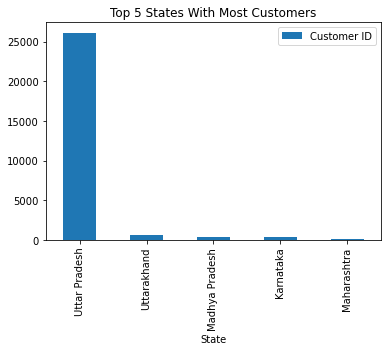

In [11]:
state_df = pd.DataFrame(df.groupby('State')['Customer ID'].count().sort_values(ascending = False))
state_df[:5].plot(kind='bar', title='Top 5 States With Most Customers')

Majority of the customer base hails from Uttar Pradesh

<AxesSubplot:title={'center':'Top 5 Products'}, xlabel='Product Code'>

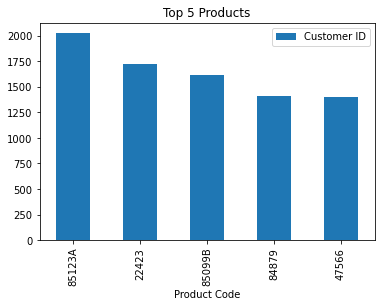

In [12]:
product_df = pd.DataFrame(df.groupby('Product Code')['Customer ID'].count().sort_values(ascending = False))
product_df[:5].plot(kind='bar', title='Top 5 Products')

### 3. Create  Customer - Item Matrix

In [13]:
customer_item_matrix = df.pivot_table(index='Customer ID',columns='Product Code',values='Purchase/Usage Frequency',aggfunc='sum')

Note: We use 3 columns which include Customer ID, Product Code and respective Frequency to create a pivot table. The values represent the total frequency a specific item purchased or used by each customer.

In [14]:
customer_item_matrix.head()

Product Code,20725,20725A,20727,20728,21034,21212,22086,22197,22197A,22382,...,23209,23209A,23209B,23298,23298A,47566,84879,85099B,85123A,85123B
Customer ID,,,,,,,,,,,,,,,,,,,,,
12347,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12349,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12352,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
12354,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12355,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
customer_item_matrix.shape

(3305, 33)

**One Hot Encoding: We apply lambda function to convert quantities above zero to 1 and keep the rest as 0**

Since we're interested in computing similarity between customers and products, the frequency is of not much significance later on and we're undertaking this brute force encoding 

In [16]:
customer_item_matrix = customer_item_matrix.applymap(lambda x: 1 if x>0 else 0)

In [17]:
customer_item_matrix.head()

Product Code,20725,20725A,20727,20728,21034,21212,22086,22197,22197A,22382,...,23209,23209A,23209B,23298,23298A,47566,84879,85099B,85123A,85123B
Customer ID,,,,,,,,,,,,,,,,,,,,,
12347,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12349,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12352,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
12354,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12355,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 4. User Based Collaborative Filtering (using Sklearn module)

### What is Cosine Similarity?

- Cosine similarity measures the similarity between two vectors projected in a multi-dimensional space by calculating the cosine of the angle between the two vectors.
- It is one of the most widely used and powerful similarity measure in Data Science. It is used in multiple applications such as finding similar documents in NLP, information retrieval, finding similar sequence to a DNA in bioinformatics, detecting plagiarism and much more.

It's calculated as follows:
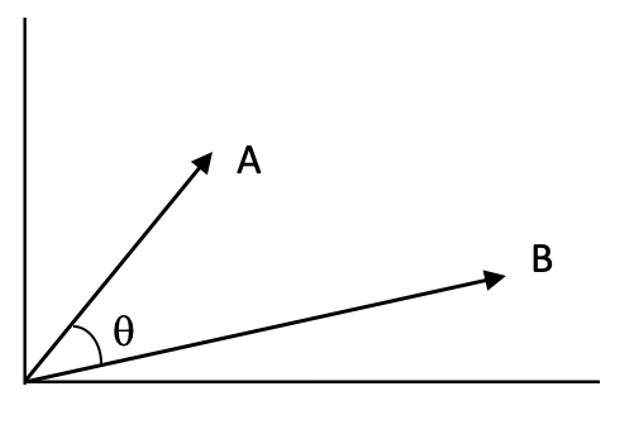

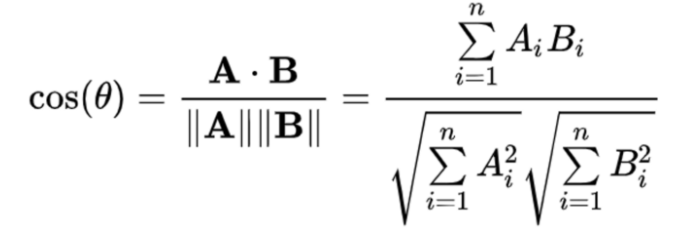

- The output value ranges from 0–1 where 0 means no similarity while a score of 1 implies that both the items are 100% similar.
- The python Cosine Similarity or cosine kernel computes similarity as the normalized dot product of input samples X and Y.

#### User based Collaborative Filtering
- User to User Similarity Matrix

In [18]:
user_to_user_sim_matrix = pd.DataFrame(cosine_similarity(customer_item_matrix))

In [19]:
user_to_user_sim_matrix.head()

,0,1,2,3,4,5,6,7,8,9,...,3295,3296,3297,3298,3299,3300,3301,3302,3303,3304
0,1.000000,0.500000,0.353553,0.0,0.707107,0.500000,1.000000,0.500000,0.0,0.408248,...,0.000000,0.316228,0.000000,0.500000,0.0,0.707107,0.707107,0.0,0.707107,0.000000
1,0.500000,1.000000,0.707107,0.0,0.707107,0.500000,0.500000,0.500000,0.0,0.204124,...,0.000000,0.316228,0.353553,1.000000,0.0,0.000000,0.000000,0.0,0.707107,0.147442
2,0.353553,0.707107,1.000000,0.0,0.500000,0.353553,0.353553,0.707107,0.0,0.144338,...,0.000000,0.447214,0.750000,0.707107,0.0,0.000000,0.000000,0.0,0.500000,0.208514
3,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.5,0.204124,...,0.707107,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.294884
4,0.707107,0.707107,0.500000,0.0,1.000000,0.707107,0.707107,0.353553,0.0,0.288675,...,0.000000,0.447214,0.000000,0.707107,0.0,0.000000,0.000000,0.0,1.000000,0.000000


#### We setup user to user matrix table column names and index using the Customer ID

In [20]:
user_to_user_sim_matrix.columns = customer_item_matrix.index

In [21]:
user_to_user_sim_matrix['CustomerID'] = customer_item_matrix.index

In [22]:
user_to_user_sim_matrix = user_to_user_sim_matrix.set_index('CustomerID')

In [23]:
user_to_user_sim_matrix.head()

Customer ID,12347,12349,12352,12354,12355,12356,12357,12359,12361,12362,...,18262,18265,18272,18274,18277,18278,18280,18281,18282,18283
CustomerID,,,,,,,,,,,,,,,,,,,,,
12347,1.000000,0.500000,0.353553,0.0,0.707107,0.500000,1.000000,0.500000,0.0,0.408248,...,0.000000,0.316228,0.000000,0.500000,0.0,0.707107,0.707107,0.0,0.707107,0.000000
12349,0.500000,1.000000,0.707107,0.0,0.707107,0.500000,0.500000,0.500000,0.0,0.204124,...,0.000000,0.316228,0.353553,1.000000,0.0,0.000000,0.000000,0.0,0.707107,0.147442
12352,0.353553,0.707107,1.000000,0.0,0.500000,0.353553,0.353553,0.707107,0.0,0.144338,...,0.000000,0.447214,0.750000,0.707107,0.0,0.000000,0.000000,0.0,0.500000,0.208514
12354,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.5,0.204124,...,0.707107,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.294884
12355,0.707107,0.707107,0.500000,0.0,1.000000,0.707107,0.707107,0.353553,0.0,0.288675,...,0.000000,0.447214,0.000000,0.707107,0.0,0.000000,0.000000,0.0,1.000000,0.000000


#### Now we make Recommendations

In [24]:
# Function that gives out recommendations for the customer id we input based on the cosine similarity calculated
def recom_eng(customer_item_matrix,user_to_user_sim_matrix,cust_id):
    cust_rec = user_to_user_sim_matrix.loc[cust_id].sort_values(ascending = False)
    cust_rec_dic = dict(cust_rec)
    recom_list = []
    a = 0
    x = list(cust_rec_dic.keys())[0]
    for y in list(cust_rec_dic.keys())[1:]:
        items_A = set(customer_item_matrix.loc[x].iloc[customer_item_matrix.loc[x].to_numpy().nonzero()].index)
        items_B = set(customer_item_matrix.loc[y].iloc[customer_item_matrix.loc[y].to_numpy().nonzero()].index)
        items_to_recommend_User_A = items_B - items_A
        z = list(items_to_recommend_User_A)
        recom_list.extend(z)
        a += len(z)
        if a>=5:
            break

    recom = df.loc[df['Product Code'].isin(recom_list),['Product Code','Product Description']].drop_duplicates().set_index('Product Code')
    return recom

In [25]:
# Recommendations for ID 12354.0
recom_eng(customer_item_matrix,user_to_user_sim_matrix,12354.0)

,Product Description
Product Code,
85123A,Recurrent Deposit Account
21212,Health Insurance
20728,Particular Plus Account
23206,Junior Account


### 5. Item-Based Collaborative Filtering[](http://)

In [26]:
# Computing an item-item matrix using cosine similarity
item_item_sim_matrix = pd.DataFrame(cosine_similarity(customer_item_matrix.T))

In [27]:
# Setting the index and columns as stock code
item_item_sim_matrix.columns = customer_item_matrix.T.index
item_item_sim_matrix['ProductCode'] = customer_item_matrix.T.index
item_item_sim_matrix = item_item_sim_matrix.set_index('ProductCode')

In [28]:
item_item_sim_matrix.head()

Product Code,20725,20725A,20727,20728,21034,21212,22086,22197,22197A,22382,...,23209,23209A,23209B,23298,23298A,47566,84879,85099B,85123A,85123B
ProductCode,,,,,,,,,,,,,,,,,,,,,
20725,1.000000,0.043355,0.607761,0.610137,0.162270,0.342382,0.248658,0.204465,0.241188,0.591498,...,0.478206,0.086711,0.463358,0.299371,0.065547,0.283515,0.189817,0.467979,0.271180,0.081934
20725A,0.043355,1.000000,0.046727,0.045691,0.000000,0.039684,0.040390,0.058222,0.066227,0.045175,...,0.055989,0.000000,0.000000,0.041849,0.000000,0.037582,0.038405,0.039684,0.034179,0.000000
20727,0.607761,0.046727,1.000000,0.559372,0.187685,0.274437,0.243460,0.244849,0.222809,0.561501,...,0.449987,0.046727,0.422561,0.271809,0.070644,0.254635,0.183043,0.396821,0.279491,0.088306
20728,0.610137,0.045691,0.559372,1.000000,0.164755,0.275606,0.263899,0.191537,0.196688,0.584145,...,0.463037,0.045691,0.415877,0.260048,0.051809,0.250708,0.191269,0.389838,0.287351,0.069079
21034,0.162270,0.000000,0.187685,0.164755,1.000000,0.173886,0.212005,0.199310,0.126958,0.187639,...,0.132888,0.000000,0.088449,0.192922,0.017252,0.185262,0.185811,0.152150,0.234010,0.051755


In [29]:
# Function that returns top 10 similar products to the item we input
def recom_sys(item_item_sim_matrix,product_id):
    top_10_similar_items = list(item_item_sim_matrix.loc[product_id].sort_values(ascending=False).iloc[:10].index)
    recom = df.loc[df['Product Code'].isin(top_10_similar_items), 
                    ['Product Code', 'Product Description']].drop_duplicates().set_index('Product Code').loc[top_10_similar_items]
    return recom

In [30]:
# Top 10 products similar to product '21034'
recom_sys(item_item_sim_matrix,'21034')

,Product Description
Product Code,
21034,Home Insurance
85123A,Recurrent Deposit Account
22469,Credit Card
22086,Vehicle Insurance
22197,Life Insurance
23298,NRI Account
20727,Long Term Deposits
22382,Long Term Loan
84879,Guarantees


In [31]:
# Creating dataframe of product code
prod_id = df.iloc[:,0].drop_duplicates()
prod_id_df = pd.DataFrame(prod_id, columns=['Product Code'])
prod_id_df.reset_index(drop=True, inplace=True)

In [32]:
# Creating dataframe of product description
prod_desc = df.iloc[:,1].drop_duplicates()
prod_desc_df = pd.DataFrame(prod_desc, columns=['Product Description'])
prod_desc_df.reset_index(drop=True, inplace=True)

In [33]:
# Creating products dataframe
prods = pd.concat([prod_id_df,prod_desc_df], axis=1)
prods

,Product Code,Product Description
0,85123A,Recurrent Deposit Account
1,84879,Guarantees
2,22727,Savings Account
3,22086,Vehicle Insurance
4,22386,Debit Card
5,20725,Funds
6,21212,Health Insurance
7,22457,Taxes
8,22469,Credit Card
9,85099B,Short Term Deposits


In [34]:
### end of notebook